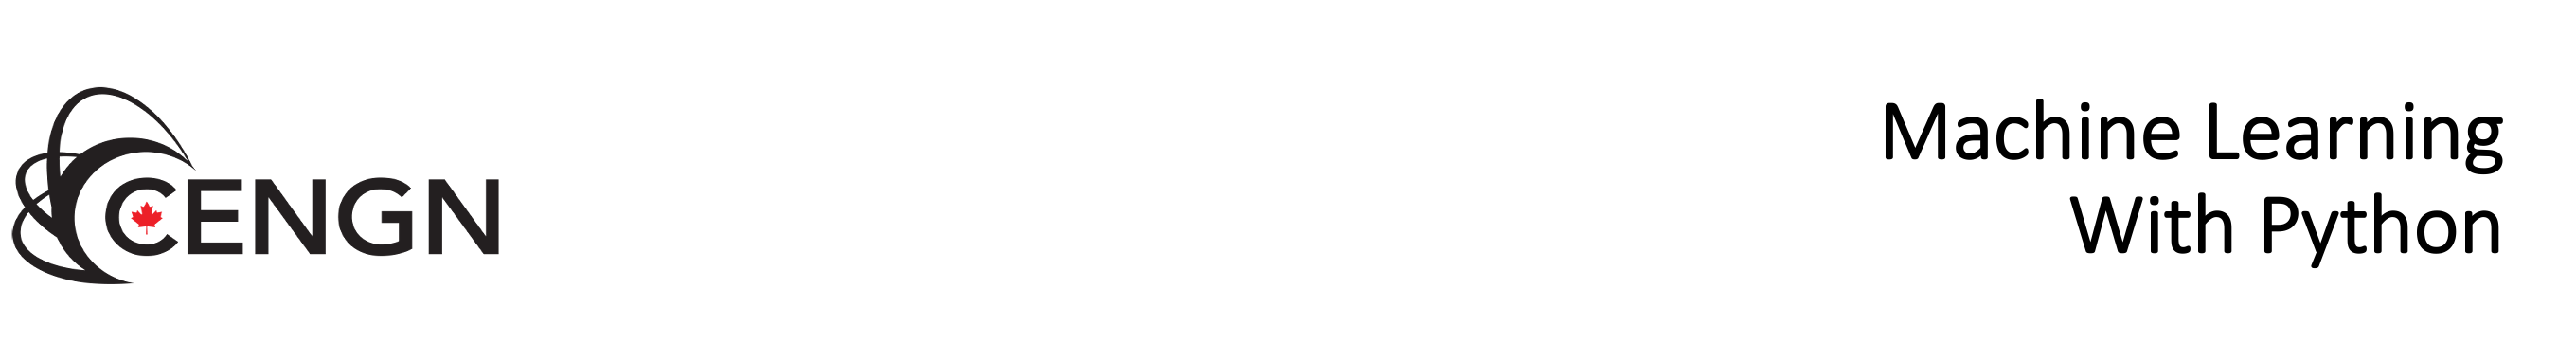
___

# **Section 4.3. Hands-On Clustering**

In this section, we will learn to implement Mini Batch K-Means clustering to compress an image using the Skearn library. 

## **Lab 2 - K-Means Clustering for Image Compression**


**Step 1: Importing the Libraries**

Let us now import all relevant libraries.

In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # Plotting library
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import load_sample_image # datasets contains sample images in the Sklearn library

`%matplotlib inline` is called cell magic. It displays Matplotlib plots in browser.

For this application, we will consider the image shown below which is from the `Scikit-Learn` datasets module. 

**Step 2: Importing the Dataset**

In [2]:
# Load a sample image flower.jpg

flower = load_sample_image("flower.jpg")   
flower.shape

(427, 640, 3)

load_sample_image(image_name) will return a three-dimensional NumPy array of height x width x colour.

**Step 3: Visualizing the Data**

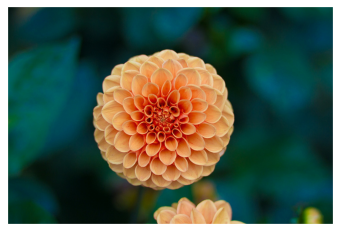

In [3]:
# Plot the image using Matplotlib

ax = plt.axes(xticks=[], yticks=[])              
ax.imshow(flower);

The image is stored in a three-dimensional array of height, width, and RGB intensity. 

In [4]:
# View portion of the dataset

flower

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)

**Step 4: Reshaping the Dataset**

We will now reshape the image to transform it from a three-dimensional array to a two-dimensional array and store the RGB intensity to lie between 0 and 1 for convenience.

In [5]:
data = flower / 255.0                # Convert RGB intensity to a [0,1] scale

# The image is stored in a 3-D array of height, width, RGB intensity. We will 
# reshape it into a 2-D array indexed by the pixel number and the RGB intensity. 

data = data.reshape(427 * 640, 3)   
data.shape

(273280, 3)

In [6]:
# View the reshaped dataset 

data

array([[0.00784314, 0.0745098 , 0.05098039],
       [0.01176471, 0.07058824, 0.05098039],
       [0.02745098, 0.07843137, 0.05098039],
       ...,
       [0.02745098, 0.18039216, 0.10980392],
       [0.03137255, 0.17647059, 0.10980392],
       [0.03529412, 0.16862745, 0.10588235]])

The `shape` output reveals that the dataset is converted to a two-dimensional array of 273,280 rows. And the above output displays sample of this data which shows the normalized RGB values (between 0 and 1).

**Step 5: Visualizing the Dataset**

To understand the variety of pixel colours in the image, let us choose 10,000 pixels and plot their colours. 

In [7]:
# Define a plot_pixels function 

def plot_pixels(data, title, colours=None, N=10000):
    if colours is None:
        colours = data # Save a copy of this sequence to be inputted the scatter plot
    
    # Choose a random subset of pixels 

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N] # Return a randomly permuted sequence of N values range;data.shape[0]=number of rows)
    colours = colours[i]  # Return an array of a 10,000 rows each with three colours intesnities (10000x3 array)
    R, G, B = data[i].T # Transfom the dataset to the required format (3x10000 array)
    # data[i] will be an array of 3 arrays each has 10,000 columns
    # each of R, G, and B will be one of these arrays.
    

    # Define the axes and markers on the figure
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))      # Define figure size
    ax[0].scatter(R, G, color=colours, marker='.')  # Scatter plot of R as x and G as y intensities
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))  # Set x & y-axis labels and limits 

    ax[1].scatter(R, B, color=colours, marker='.')  # Scatter plot of R and B intensities
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

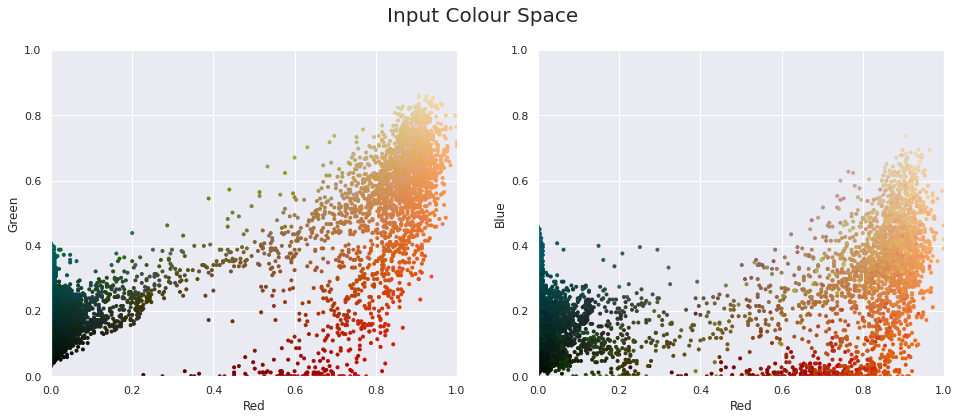

In [8]:
plot_pixels(data, title='Input Colour Space')

The entire input colour space contains $256\cdot 256\cdot 256 = 16.77$ million colours.

**Step 6: Running the Model**

In [9]:
# Run the minibatchkmeans function from Sklearn

# Run K-Means with K = 16 

kmeans = MiniBatchKMeans(16)
kmeans.fit(data)    # Fit the model
predictions = kmeans.predict(data)  # Return 16 clusters
new_colours = kmeans.cluster_centers_[predictions] # Return compressed colour intensities

print("shape",new_colours.shape)

print("\nnew_colours:\n",new_colours)
print("\n original_colours:\n",data)

shape (273280, 3)

new_colours:
 [[0.01416736 0.06826843 0.04570561]
 [0.01416736 0.06826843 0.04570561]
 [0.01416736 0.06826843 0.04570561]
 ...
 [0.03533868 0.14044118 0.10793226]
 [0.03533868 0.14044118 0.10793226]
 [0.03533868 0.14044118 0.10793226]]

 original_colours:
 [[0.00784314 0.0745098  0.05098039]
 [0.01176471 0.07058824 0.05098039]
 [0.02745098 0.07843137 0.05098039]
 ...
 [0.02745098 0.18039216 0.10980392]
 [0.03137255 0.17647059 0.10980392]
 [0.03529412 0.16862745 0.10588235]]


The output above compares the predicted colours to the original colours. Note that the new colours' intensities are similar. That's because it is reduced to sixteen colours only.

**Step 7: Evaluating the Model Performance**

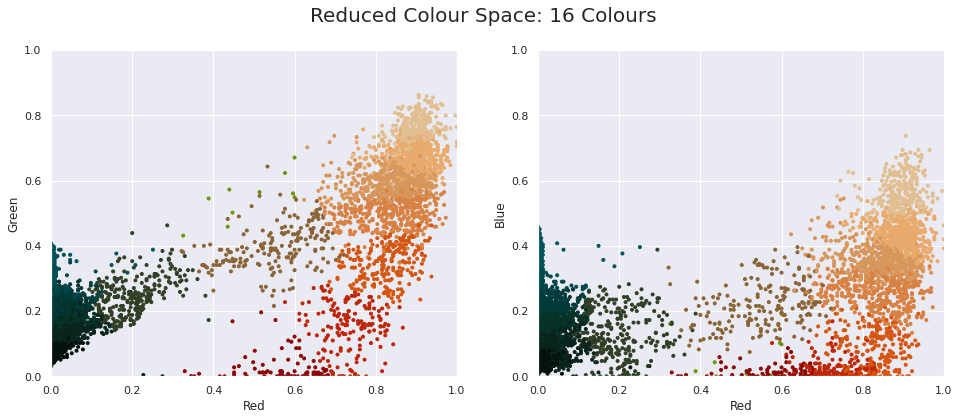

In [10]:
# Plot the reduced colour space using the 16 colours 

plot_pixels(data, colours=new_colours,
            title="Reduced Colour Space: 16 Colours")

As can be seen in the image above, each pixel has been assigned the colour of its closest cluster center.

Now, let us look at how the original image compares with the reduced image with 16 colours after K-Means clustering.

In [11]:
# Display the size of the original image

flower.shape

(427, 640, 3)

Now, we will plot the original image and the recoloured image for comparison. We will use the `subplot()` function to create a figure and a set of subplots.

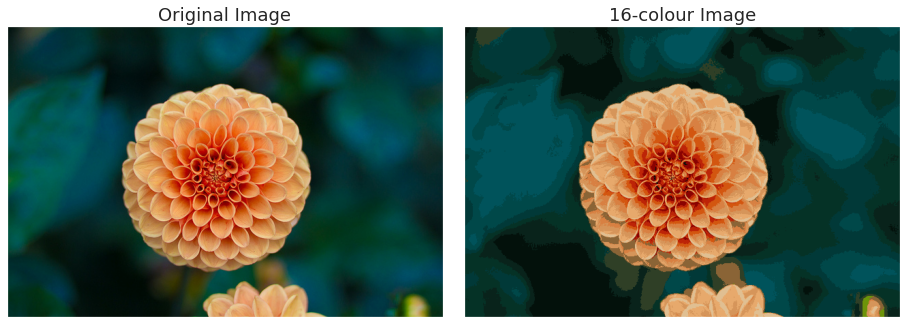

In [12]:
# Define the recoloured image

o_colour = flower.shape 
flower_recoloured = new_colours.reshape(o_colour) # Define the resized image and convert it to 3-D array

# Define the figure settings, including number of plots

fig, ax = plt.subplots(1, 2, figsize=(16, 6),  # 1: 1 rows; 2: 2 columns; 
                       subplot_kw=dict(xticks=[], yticks=[])) # dict with keywords to be used to create
                                                              # each subplot.
fig.subplots_adjust(wspace=0.05)  # Set space between two subplots

# Display the original flower

ax[0].imshow(flower)          #  Display the orginal flower image on first subplot
ax[0].set_title('Original Image', size=18)  # Specify the title and the font size

# Display the resized flower

ax[1].imshow(flower_recoloured)
ax[1].set_title('16-colour Image', size=18);

In [13]:
# Save the above figure in the current directory

fig.savefig('flower_comparison.png')

The image on the right is instantly recognizable as the original image. Naturally, quite a bit of detail is lost in the right panel. However, the compression achieved is more than a million times. This application goes to show that K-Means and clustering algorithms in general can be employed in very unconventional ways with stunning results.

## **Exercise**

Run K-Means clustering with K=8 using `china.jpg` image. You can load this image from the Sklearn library, same as we did with the flower image.

In [14]:
# Import the Libraries
%matplotlib inline  
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # Plotting library
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import load_sample_image # datasets contains sample images in the Sklearn library

In [15]:
# Load the image

china = load_sample_image("china.jpg")   
china.shape

(427, 640, 3)

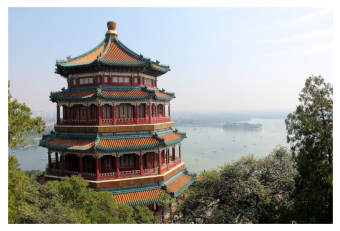

In [16]:
# Plot the image
ax = plt.axes(xticks=[], yticks=[])              
ax.imshow(china);

In [17]:
# View portion of the dataset

china

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

In [18]:
# Reshape the dataset
data2 = china / 255.0                # Convert RGB intensity to a [0,1] scale

# The image is stored in a 3-D array of height, width, RGB intensity. We will 
# reshape it into a 2-D array indexed by the pixel number and the RGB intensity. 

data2 = data2.reshape(427 * 640, 3)   
data2.shape

(273280, 3)

In [19]:
# View the reshaped dataset 

data2

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]])

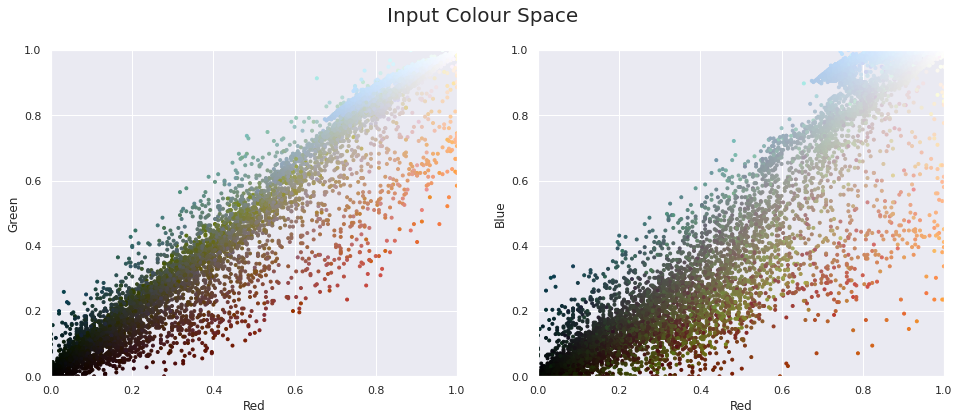

In [20]:
plot_pixels(data2, title='Input Colour Space')

In [21]:
# Run the Model
# Run the minibatchkmeans function from Sklearn

# Run K-Means with K = 8

kmeans8 = MiniBatchKMeans(8)
kmeans8.fit(data2)    # Fit the model
predictions8 = kmeans.predict(data2)  # Return 16 clusters
new_colours8 = kmeans.cluster_centers_[predictions8] # Return compressed colour intensities

print("shape",new_colours8.shape)

print("\nnew_colours:\n",new_colours8)
print("\n original_colours:\n",data2)

shape (273280, 3)

new_colours:
 [[0.8811329  0.74989107 0.57333333]
 [0.8811329  0.74989107 0.57333333]
 [0.8811329  0.74989107 0.57333333]
 ...
 [0.18788927 0.24844291 0.15028835]
 [0.01416736 0.06826843 0.04570561]
 [0.01416736 0.06826843 0.04570561]]

 original_colours:
 [[0.68235294 0.78823529 0.90588235]
 [0.68235294 0.78823529 0.90588235]
 [0.68235294 0.78823529 0.90588235]
 ...
 [0.16862745 0.19215686 0.15294118]
 [0.05098039 0.08235294 0.02352941]
 [0.05882353 0.09411765 0.02745098]]


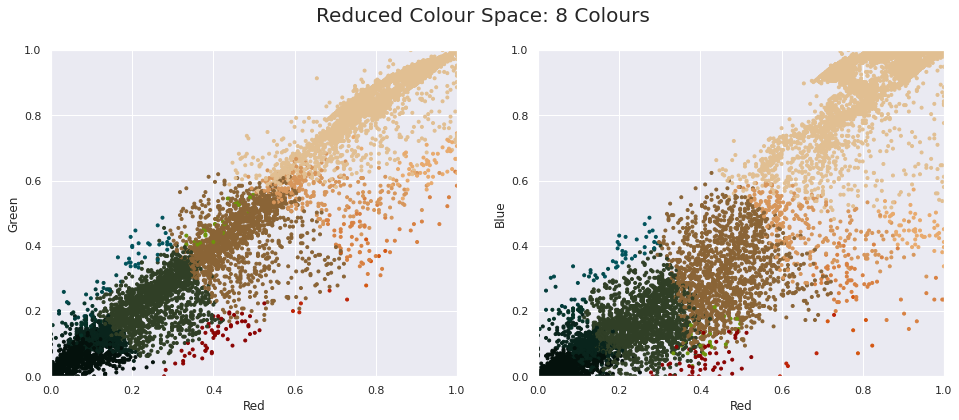

In [22]:
# Evaluate the model performance by plotting the original and recoloured images
# Plot the reduced colour space using the 16 colours 

plot_pixels(data2, colours=new_colours8,
            title="Reduced Colour Space: 8 Colours")

In [23]:
# Display the size of the original image

china.shape

(427, 640, 3)

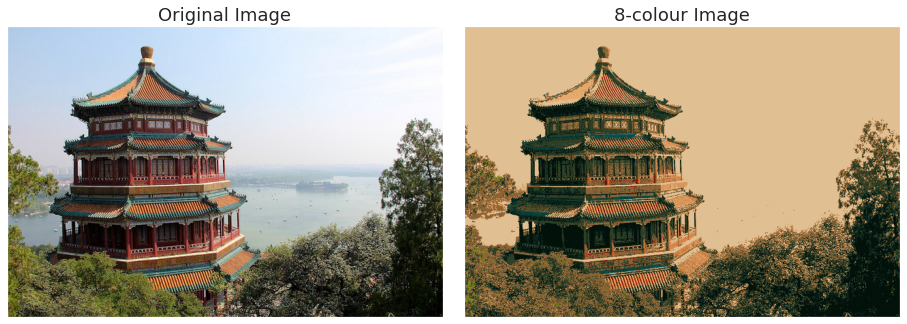

In [24]:
# Define the recoloured image

o_colour8 = china.shape 
china_recoloured = new_colours8.reshape(o_colour8) # Define the resized image and convert it to 3-D array

# Define the figure settings, including number of plots

fig, ax = plt.subplots(1, 2, figsize=(16, 6),  # 1: 1 rows; 2: 2 columns; 
                       subplot_kw=dict(xticks=[], yticks=[])) # dict with keywords to be used to create
                                                              # each subplot.
fig.subplots_adjust(wspace=0.05)  # Set space between two subplots

# Display the original flower

ax[0].imshow(china)          #  Display the orginal flower image on first subplot
ax[0].set_title('Original Image', size=18)  # Specify the title and the font size

# Display the resized flower

ax[1].imshow(china_recoloured)
ax[1].set_title('8-colour Image', size=18);

In [25]:
# Save the above figure in the current directory

fig.savefig('china_comparison.png')

Remember to shutdown this notebook once done from this lab.

## **Switch to LMS**

Switch to LMS to review the lab results and then start with the next Lab (Lab 3 - Hierarchical Clustering).